---
title:  "DBSCAN tutorial"  
excerpt: "Unsupervised Learning, DBSCAN"  

categories:  
  - Machine-Learning  
tags:  
  - Clustering  
  - DBSCAN
  - Medium  
last_modified_at: 2020-05-31T15:00:00-05:00
---

## Reference  
- [Medium Cory Maklin](https://towardsdatascience.com/machine-learning-clustering-dbscan-determine-the-optimal-value-for-epsilon-eps-python-example-3100091cfbc)

DBSCAN tutorial은 상기 주소를 참조했습니다. 

__DBSCAN, or <span style='color:red'>Density-Based Spatial Clustering</span> of Applications with Noise, is an unsupervised machine learning algorithm.__

**Pros**  

1. 입력매개변수(K-cluster 분석의 k값같은)가 사전 도메인지식으로 많이 필요하지 않다.  
2. 임의모양의 클러스터 검색 ( k-means 와 같이, 군집이 구형 모양을 갖는다고 가정하지 않는다)
3. 대용량 데이터베이스에서 뛰어난 효율성 -> 이 부분은 정확히 모르겠다.
4. 잡음점을 제거하기 쉽다

## __Key Concept__  
- eps : 엡실론이라 불리우며, threshold 역할을 한다. 두 점 사이의 거리가, 이 값보다 작으면, 이웃으로 본다.  
- min_sample : core 포인트를 만드는 구성요건으로 eps 내의 점. 즉 이웃의 갯수를 의미한다. 만약 min_sample 이 3일때, eps를 충족하는 점들의 거리가 이 갯수이상이 된다면, 그 포인튼 Core Point!  
 > <span style='color:red'> __중요 포인트는 반드시 갯수를 카운트 할때, 본인 스스로 point도 포함해야 한다.!!__</span>  
- metric : The metric to use when calculating distance between instances in a feature array  

```core point``` : 설정한 이웃점(min_sample) 수가 설정한 반지름(epc) 내에 떨어진다면, 그 점은__(자기 자신 포인트 포함)__ core point 이다.  
```border point``` : e 내에서, 설정한 이웃 점의 갯수보다 더 작은 수의 이웃을 갖는 점이지만, core poring 로 부터, e 안에 놓이는 점이다.  
```noise point``` : core도 border도 아닌 다른 모든 점들은 잡음점이다.  

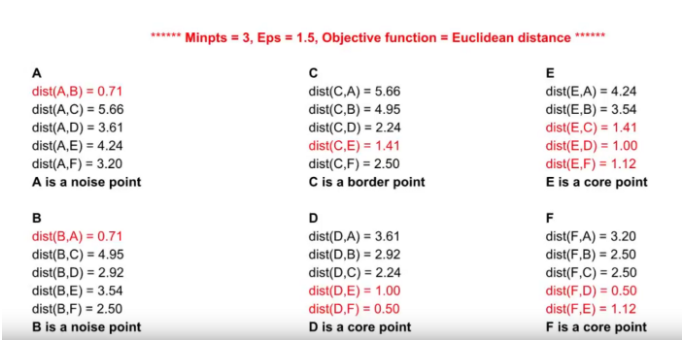

위의 예제는 6개 점이 있다고 할때, 각각의 점을 모두 라벨링하는 과정이다.(eps=1.5,min_sample:3)  
> A: eps 보다 작은 distance가 2개 밖에 없고, A,B 모두 core point가 아님 -> noise point   
> B : eps 보다 작은 distance가 2개 밖에 없고, A,B 모두 core point가 아님 -> noise point  
> C : eps 보다 작은 distance가 2개 밖에 없지만, E가 core point 임. -> border point  
> D : eps 보다 작은 distance가 3개 있음. 조건충족 -> core point  
> E : eps 보다 작은 distance가 3개 있음. 조건충족 -> core point  
> F : eps 보다 작은 distance가 3개 있음. 조건충족 -> core point  

In [2]:
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

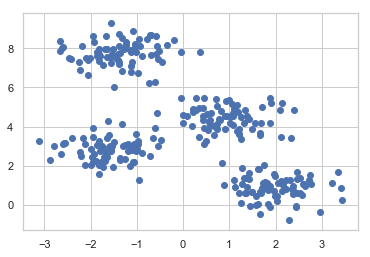

In [3]:
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:,0], X[:,1])

DBSCAN 알고리즘에서, 사용하는 주요한 parameter 는 **<span style='color:red'>eps, min_sample</span>** 이다.  
이를 찾는 알고리즘은 layman’s terms 에 의하면, 1개의 점에서, 가까운 순으로 distance를 구했을대, 급격히 늘어나는 구간을 찾고 그 값을 활용하는 것이  
이상적이란 논거를 활용한다.  
[https://iopscience.iop.org/article/10.1088/1755-1315/31/1/012012/pdf]

In [7]:
print(X.shape,y.shape)

(300, 2) (300,)


---

__Small topic : Start__  

In [19]:
neigh = NearestNeighbors(n_neighbors=4)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

In [20]:
print(distances.shape,indices.shape,len(distances),len(indices))

(300, 4) (300, 4) 300 300


In [21]:
indices[0:3]

array([[  0,   4, 124, 118],
       [  1,  89, 146,  48],
       [  2, 186, 159, 107]], dtype=int64)

In [22]:
distances[0:3]

array([[0.        , 0.49822928, 0.78213781, 0.83547371],
       [0.        , 0.08829225, 0.12609655, 0.17241417],
       [0.        , 0.12019666, 0.21667913, 0.3077693 ]])

In [23]:
## 위의 값이 어떻게 나오는지 궁금하여 조합수가 아닐까 의심했지만...역시 아니었다. 
from itertools import combinations
combi = combinations(X,2)    
print(len(list(combi)))

44850


small topic : n_neighbors=4 는 본인 포인트를 포함하여, 가까운 이웃 4개에 대한 인덱스를 반환한다.  
위처럼 neigh = NearestNeighbors(n_neighbors=4) 이면, 4개씩의 컬럼이 반환된다.  
__Small topic End__  

---

#### 다시 본론으로  

In [28]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

In [29]:
distances[0:10]

array([[0.        , 0.49822928],
       [0.        , 0.08829225],
       [0.        , 0.12019666],
       [0.        , 0.11049628],
       [0.        , 0.31064694],
       [0.        , 0.61124146],
       [0.        , 0.35774854],
       [0.        , 0.01966341],
       [0.        , 0.29733787],
       [0.        , 0.03349706]])

상기 값에서, 거리가 짧게 나온 순으로 세운다.

In [30]:
distances_sort = np.sort(distances, axis=0)

In [31]:
distances_sort[0:10]

array([[0.        , 0.00647163],
       [0.        , 0.00647163],
       [0.        , 0.00975014],
       [0.        , 0.00975014],
       [0.        , 0.01234906],
       [0.        , 0.01234906],
       [0.        , 0.01264242],
       [0.        , 0.01264242],
       [0.        , 0.01430681],
       [0.        , 0.01430681]])

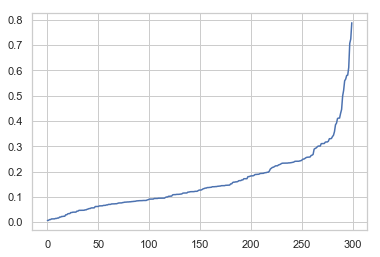

In [43]:
distances_plot = distances_sort[:,1]
plt.plot(distances_plot)
# ax.set_ylabel(ylabel = "distance")

급격히 값이 증가하는 부분을 찾는다. 여기서는 0.3 으로 판단할 수 있다.  

In [44]:
m = DBSCAN(eps=0.3, min_samples=5)
m.fit(X)

DBSCAN(eps=0.3)

In [45]:
clusters = m.labels_

In [51]:
print(len(clusters))
clusters

300


array([-1,  0,  1,  0, -1, -1, -1,  1, -1,  4,  2, -1,  1, -1, -1,  1,  1,
        3,  2,  8,  3,  3,  1,  2,  2, -1,  3,  1, -1,  1,  7,  0, -1, -1,
        0,  0,  0, -1,  2,  3,  1,  2, -1,  1,  2,  2,  0,  2,  0,  3,  2,
        3,  0,  3, -1,  2, -1, -1,  0,  3,  0,  1, -1,  2,  2,  2,  0,  3,
       -1,  2,  1, -1,  0,  2,  2,  4,  2,  1,  3,  0, -1,  1,  3,  3,  0,
        1,  3,  5, -1,  0,  1,  3, -1,  2,  2,  1,  6,  3, -1, -1,  4, -1,
        7,  3,  1,  3, -1,  1, -1,  1,  8, -1,  3, -1,  3, -1,  0,  3,  6,
       -1, -1,  3, -1,  3,  6,  3,  3,  8,  3,  2, -1,  2,  2, -1,  0,  8,
        9,  0, -1,  7, -1,  2,  1, -1, -1,  2,  0, -1,  0,  0,  0,  1, -1,
        5, 10,  2,  0,  2,  3,  1, -1,  1,  1,  6,  1, -1, -1,  5,  3,  1,
        1,  0,  3, -1, -1,  0,  3,  3,  1,  2,  3,  1,  2,  2,  5,  1,  1,
        1,  3,  0, -1,  2,  1,  1,  2,  2,  9, -1,  2,  0,  1,  2, 10,  2,
        1, -1,  2,  4,  1, -1,  1,  2,  5, -1,  0,  2,  2,  3, -1,  1,  0,
        3,  3,  9, 10,  9

In [49]:
## 총 12개 그룹으로 나뉜것을 알 수 있다. 
set(clusters)

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10}

In [47]:
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

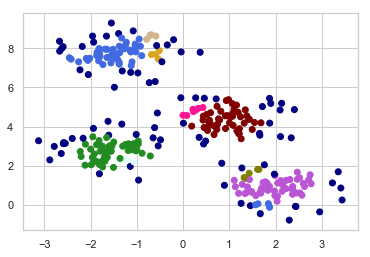

In [48]:
plt.scatter(X[:,0], X[:,1], c=vectorizer(clusters))

총 8개 그룹으로 뭉쳐진 것을 알 수 있다.  
dark blue 포인트들은 __noise_point__ 이다.

만약 좀 더 크게 묶는다면,   

In [59]:
m01 = DBSCAN(eps=0.3, min_samples=10)
m01.fit(X)
clusters01 = m01.labels_

In [60]:
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

In [61]:
len(set(clusters01))

9

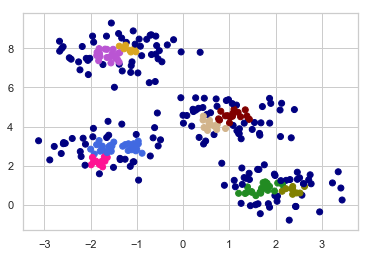

In [62]:
plt.scatter(X[:,0], X[:,1], c=vectorizer(clusters01))

9개 그룹으로 쪼개진 것을 알 수 있다.   
다음 posting 에서는 카테고리컬 변수들의 clustering 을 살펴본다.